<a href="https://colab.research.google.com/github/aquapathos/BasicAI/blob/master/IAI3_2_%E6%B1%BA%E5%AE%9A%E6%9C%A8%E3%81%AE%E5%AD%A6%E7%BF%92_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. アルビノ判定の決定木

講義で例として挙げた、アルビノ判定の決定木をプログラムで作ってみます。

In [ ]:
# モジュールのインポート
!apt-get -qq -y install fonts-ipafont-gothic > /dev/null
import pandas as pd
import numpy as np
from sklearn import tree
from graphviz import Digraph,Source
import pydotplus as pdp

In [ ]:
rawdata=np.array([
    # 4つの成分の意味
    # 第0成分: 動物種　　０:ウサギ、1:ゾウ
    # 第1成分: 体の色　0:白、1:茶、2:灰色
    # 第2成分: 目の色　　０:赤、1:黒　　
    # 第3成分: アルビノ判定　　負：アルビノではない　　　正：アルビノ
    [0,1,1,"負"],
    [0,0,0,"正"],
    [0,2,0,"負"],
    [0,0,0,"正"],
    [0,0,1,"負"],
    [1,0,0,"正"],
    [1,2,0,"負"],
    [1,2,1,"負"],
    ])

items=['動物種','体の色','目の色']
results=['アルビノ判定']
df = pd.DataFrame(rawdata,columns=np.r_[items,results])
df

,動物種,体の色,目の色,アルビノ判定
0,0,1,1,負
1,0,0,0,正
2,0,2,0,負
3,0,0,0,正
4,0,0,1,負
5,1,0,0,正
6,1,2,0,負
7,1,2,1,負


### 訓練データをもとに決定木を構成する


In [ ]:
# 決定木学習器の準備
classifier = tree.DecisionTreeClassifier(criterion='entropy') # 評価基準を情報量基準（entropy)とする。
# 訓練データをもとに学習の実行
classifier.fit(df[items],df[results]);

### 完成した決定木をpng画像として出力




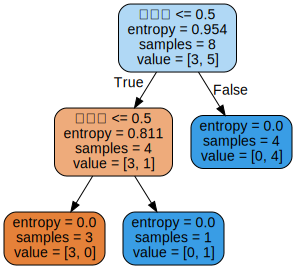

In [ ]:
# Graphviz 用の dot データを作成する
dot_data = tree.export_graphviz(classifier, 
            out_file=None, # 出力ファイル名 None なら出力しない
            filled=True, # ノードを色づけする
            rounded=True, # ノードの角を丸く
            feature_names=items) 

# 画像の保存
graph = pdp.graph_from_dot_data(dot_data)
for node in graph.get_nodes():
    node.set_fontname("IPAGothic")
graph.write_png("アルビノ判定.png")

# 画面表示用データの作成
Source(dot_data)

# 決定木の意味



1.   まず「体の色」を調べる。0.5以下なら左の枝、0.5を超えると右の枝。いま、体の色は０:白、1:茶、2:灰色、としてあるので、体の色が白なら左へ、茶と灰色は右へ。
-  **entropy: 0.954**  体の色が分かった場合のエントロピーは0.954 
- **samples = 8 value = [3, 5]** データ数は８で、そのうちアルビノは３，アルビノでないものは５
2. 2段目。右の枝は、**entropy:0 samples = 4,value=[0,4]** データ数は４つで、そのすべてはアルビノではない、つまり、体の色が茶と灰色の場合はアルビノではない、と判断。エントロピーが０ということは、曖昧性が０、つまり判定結果の確定を意味する。
左の枝では、「目の色」をチェックして、0.5 を基準に振り分け。目の色は０:赤、1:黒としているので、赤は左、黒は右。
3. 左の枝も右の枝もエントロピー０、つまりここで判定は確定する。左に来るデータは３つですべてアルビノ、右はデータが１つで、アルビノではない。

まとめると、まず「体の色」を調べて白以外ならアルビノではないと判定、白の場合は「目の色」を調べ、赤ならアルビノ、さもなくばアルビノではない、と判定。




# ２．不動産販売

![2017-09-23 18 27 59](https://user-images.githubusercontent.com/5820803/30771930-0fbc20de-a08d-11e7-922a-6e8e641170f4.PNG)

上のような不動産の販売実績データを訓練データとして、「住居形態」「家族構成」「収入」「ローン残」をもとに購入の有無を予測する決定木を作ってみましょう。

まず、学習用のデータを作成します。


In [ ]:
rawdata=np.array([
    [0,0,0,1,"×"],
    [1,2,1,1,"×"],
    [1,1,0,1,"×"],
    [0,0,1,1,"×"],
    [0,2,1,0,"○"],
    [0,1,1,0,"○"],
    [0,2,0,0,"×"],
    [1,2,1,0,"○"],
    ])

items=['住居形態','家族構成','収入','ローン残']
results=['販売実績']
df = pd.DataFrame(rawdata,columns=np.r_[items,results])
df

,住居形態,家族構成,収入,ローン残,販売実績
0,0,0,0,1,×
1,1,2,1,1,×
2,1,1,0,1,×
3,0,0,1,1,×
4,0,2,1,0,○
5,0,1,1,0,○
6,0,2,0,0,×
7,1,2,1,0,○


### 訓練データをもとに決定木を生成

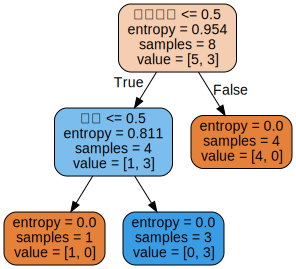

In [ ]:
# 決定木学習器の準備
classifier = tree.DecisionTreeClassifier(criterion='entropy') # 評価基準を情報量基準（entropy)とする。
# 訓練データをもとに学習の実行
classifier.fit(df[items],df[results]);

# Graphviz 用の dot データを作成する
dot_data = tree.export_graphviz(classifier, 
            out_file=None, # 出力ファイル名 None なら出力しない
            filled=True, # ノードを色づけする
            rounded=True, # ノードの角を丸く
            feature_names=items) 

# 画像の保存
graph = pdp.graph_from_dot_data(dot_data)
for node in graph.get_nodes():
    node.set_fontname("IPAGothic")
graph.write_png("販売予測.png")

# 画面表示用データの作成
Source(dot_data)

## 決定木の概要
(1) まず「ローン残」をチェック。残ありの場合は買ってくれないと判定。4/8 は確定。    
(2) ローン残なしの場合は「収入」をチェック、低収入の客は買ってくれない(1/8)。高収入の客は買ってくれる(3/8)*斜体テキスト*

# ３．薬物犯罪の実刑の有無の予想

In [ ]:
rawdata = np.array([
    # ５つの成分の意味
    # 第0成分: 性別 0:男性、1:女性
    # 第1成分: 年齢 0:未成年、1:成年、2:老人
    # 第2成分: 薬物　　０:シンナー、1:大麻　　２：覚せい剤
    # 第3成分: 犯罪歴　0:なし、1:あり
    # 第4成分: 実判決　　猶予、実刑
    [0,0,0,0,"猶予"],
    [1,0,0,0,"猶予"],
    [0,2,1,0,"猶予"],
    [0,0,0,1,"実刑"],
    [0,2,1,1,"実刑"],
    [1,1,2,1,"実刑"],
    [1,1,0,1,"実刑"],
    [1,0,2,1,"実刑"],
    [0,2,2,0,"実刑"],
    [1,0,2,1,"実刑"]
    ])

items=['性別','年齢','薬物','犯罪歴']
results=['実判決']
df = pd.DataFrame(rawdata,columns=np.r_[items,results])
df

,性別,年齢,薬物,犯罪歴,実判決
0,0,0,0,0,猶予
1,1,0,0,0,猶予
2,0,2,1,0,猶予
3,0,0,0,1,実刑
4,0,2,1,1,実刑
5,1,1,2,1,実刑
6,1,1,0,1,実刑
7,1,0,2,1,実刑
8,0,2,2,0,実刑
9,1,0,2,1,実刑


### 訓練データをもとに決定木を生成

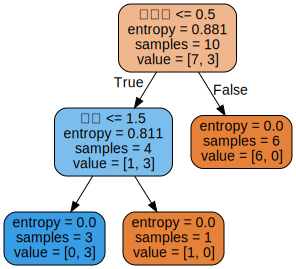

In [ ]:
# 決定木学習器の準備
classifier = tree.DecisionTreeClassifier(criterion='entropy') # 評価基準を情報量基準（entropy)とする。
# 訓練データをもとに学習の実行
classifier.fit(df[items],df[results]);

# Graphviz 用の dot データを作成する
dot_data = tree.export_graphviz(classifier, 
            out_file=None, # 出力ファイル名 None なら出力しない
            filled=True, # ノードを色づけする
            rounded=True, # ノードの角を丸く
            feature_names=items) 

# 画像の保存
graph = pdp.graph_from_dot_data(dot_data)
for node in graph.get_nodes():
    node.set_fontname("IPAGothic")
graph.write_png("判決予測.png")

# 画面表示用データの作成
Source(dot_data)

## 決定木の意味
(1) まず「犯罪歴」をチェック。「あり」の場合(6/10)は実刑    
(2) 犯罪歴なしの場合は「薬物」をチェック、「覚せい剤」の場合は実刑確定(1/10)。それ以外の場合は執行猶予(3/10)

# 決定木による予測

**classifier.predict(予測したい事例のリスト)** により、判定結果が返される。

たとえば、「成人女性で犯罪歴あり、薬物が覚せい剤」ならば、[1,1,1,1]と表せるので、試してみると、

In [ ]:
result = classifier.predict([[1,1,1,1]])
print("予想される判決は"+result[0])

予想される判決は実刑


## 全判定結果

In [ ]:
df['判決予測']=classifier.predict(df[items])
df

,性別,年齢,薬物,犯罪歴,実判決,判決予測
0,0,0,0,0,猶予,猶予
1,1,0,0,0,猶予,猶予
2,0,2,1,0,猶予,猶予
3,0,0,0,1,実刑,実刑
4,0,2,1,1,実刑,実刑
5,1,1,2,1,実刑,実刑
6,1,1,0,1,実刑,実刑
7,1,0,2,1,実刑,実刑
8,0,2,2,0,実刑,実刑
9,1,0,2,1,実刑,実刑


## 正解率

In [ ]:
print("正解率 {:3.2f}　％".format((df['実判決'] != df['判決予測']).value_counts()[False]*100/len(df)))

正解率 100.00　％


訓練データとテストデータが同じなので、正解率100%は当然です。実際に決定木を使用するシーンでは、訓練に使わなかったデータでの正解率が重要です。